1. Significant earthquakes since 2150 B.C.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series, DataFrame
Sig_Eqs=pd.read_csv('earthquakes-2023-10-24_16-20-01_+0800.tsv', delimiter='\t')

1.1

In [16]:
top_deaths=Sig_Eqs.groupby(['Country'])['Deaths'].sum()
top_10_countries=top_deaths.nlargest(10)
print(top_10_countries)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


1.2

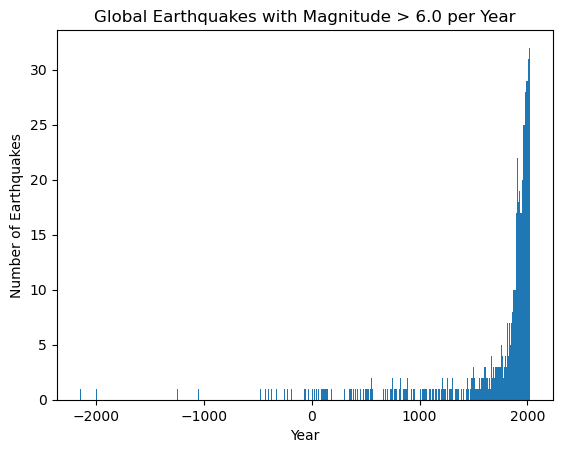

In [17]:
Mig6=Sig_Eqs[Sig_Eqs['Mag']>6.0]
earthquake_counts = Mig6.groupby('Year').size()
plt.bar(earthquake_counts.index, earthquake_counts.values,10)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Global Earthquakes with Magnitude > 6.0 per Year')
plt.show()

Explanation：The total number of seismic magnitudes greater than 6 began to grow rapidly around 1800, probably due to (1) The expansion of seismic detection networks: the invention of seismic instrumentation and satellite technology, making seismic events easier to detect and record (2) Population growth and urbanization: population activity and urbanization exacerbated the impact of earthquakes.

1.3

In [18]:
data = Sig_Eqs
Sig_Eqs['Year']=Sig_Eqs['Year'].fillna(0).astype(int)
Sig_Eqs['Mo']=Sig_Eqs['Mo'].fillna(0).astype(int)
Sig_Eqs['Dy']=Sig_Eqs['Dy'].fillna(0).astype(int)
def CountEq_LargestEq(data):
    results = []

    # Group the data by country
    grouped_data = data.groupby('Country')

    for country, group in grouped_data:
        total_earthquakes = group[(group['Year'] >= -2150)]['Year'].count()

        largest_earthquake = group[group['Mag'] == group['Mag'].max()]
        largest_earthquake_date = None

        if not largest_earthquake.empty:
            year = largest_earthquake['Year'].values[0]
            month = largest_earthquake['Mo'].values[0]
            day = largest_earthquake['Dy'].values[0]
            largest_earthquake_date = f"{year}-{month}-{day}"

        results.append((country, total_earthquakes, largest_earthquake_date))

    return results

# Apply CountEq_LargestEq to the earthquake data
results = CountEq_LargestEq(data)

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Country', 'Total Earthquakes', 'Date of Largest Earthquake'])

# Sort the results DataFrame in descending order by the date of the largest earthquake
results_df = results_df.sort_values('Date of Largest Earthquake', ascending=False)

# Print the results
for index, row in results_df.iterrows():
    print(f"Country: {row['Country']}, Total Earthquakes since 2150 B.C.: {row['Total Earthquakes']}, Date of Largest Earthquake: {row['Date of Largest Earthquake']}")

Country: SPAIN, Total Earthquakes since 2150 B.C.: 34, Date of Largest Earthquake: 881-5-26
Country: IRAN, Total Earthquakes since 2150 B.C.: 384, Date of Largest Earthquake: 856-12-22
Country: LEBANON, Total Earthquakes since 2150 B.C.: 14, Date of Largest Earthquake: 551-7-9
Country: GREECE, Total Earthquakes since 2150 B.C.: 270, Date of Largest Earthquake: 365-7-21
Country: MOROCCO, Total Earthquakes since 2150 B.C.: 21, Date of Largest Earthquake: 2023-9-8
Country: CUBA, Total Earthquakes since 2150 B.C.: 14, Date of Largest Earthquake: 2020-1-28
Country: COMOROS, Total Earthquakes since 2150 B.C.: 1, Date of Largest Earthquake: 2018-5-15
Country: ZAMBIA, Total Earthquakes since 2150 B.C.: 1, Date of Largest Earthquake: 2017-2-24
Country: MADAGASCAR, Total Earthquakes since 2150 B.C.: 1, Date of Largest Earthquake: 2017-1-11
Country: RWANDA, Total Earthquakes since 2150 B.C.: 5, Date of Largest Earthquake: 2015-8-7
Country: THAILAND, Total Earthquakes since 2150 B.C.: 4, Date of L

2.Wind speed in Shenzhen during the past 10 years

C:\Users\yz\AppData\Local\Temp\ipykernel_83428\3882620782.py:7: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  SZ_wind=pd.read_csv('2281305.csv')


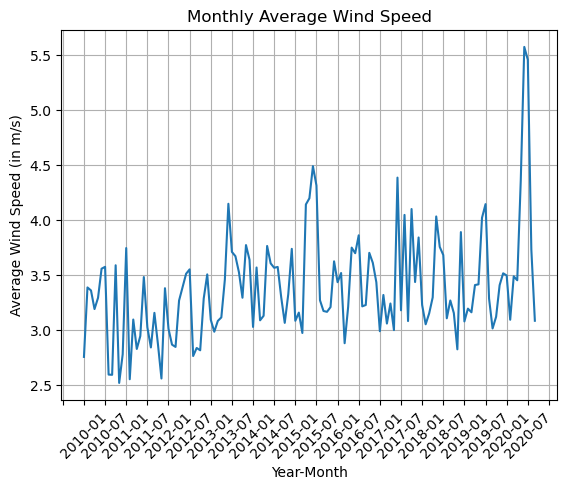

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from pandas import Series, DataFrame

SZ_wind=pd.read_csv('2281305.csv')
SZ_wind['year'] = SZ_wind['DATE'].str.split('-').str[0]
SZ_wind['month'] = SZ_wind['DATE'].str.split('-').str[1]
SZ_wind['type_code'] = SZ_wind['WND'].str.split(',').str[2]
SZ_wind['speed_rate'] = SZ_wind['WND'].str.split(',').str[3]
SZ_wind = SZ_wind[SZ_wind['speed_rate'] != 9999]
SZ_wind['speed_rate'] = SZ_wind['speed_rate'].replace('9999',np.nan) 
SZ_wind['speed_rate'] = SZ_wind['speed_rate'].astype(float) / 10

SZ_wind['speed_quality_code'] = SZ_wind['WND'].str.split(',').str[4]
monthly_avg_speed = SZ_wind.groupby(['year', 'month'])['speed_rate'].mean().reset_index()

x = [f'{year}-{month}' for year, month in zip(monthly_avg_speed['year'],monthly_avg_speed['month'])]
y = monthly_avg_speed.speed_rate


ticker_spacing = 6

fig, ax = plt.subplots()

plt.xlabel('Year-Month')
plt.ylabel('Average Wind Speed (in m/s)')
plt.title('Monthly Average Wind Speed')

ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The trend from 2013 to 2019 is relatively obvious, with a roughly 3-year cycle, and all of them suddenly increase at the end of the wave peak.

3.Explore a data set

3.1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

JAN_MAYEN = pd.read_csv('JAN_MAYEN.csv')
JAN_MAYEN['TEMP'] = JAN_MAYEN['TEMP'].replace(999.9, np.nan)

3.2

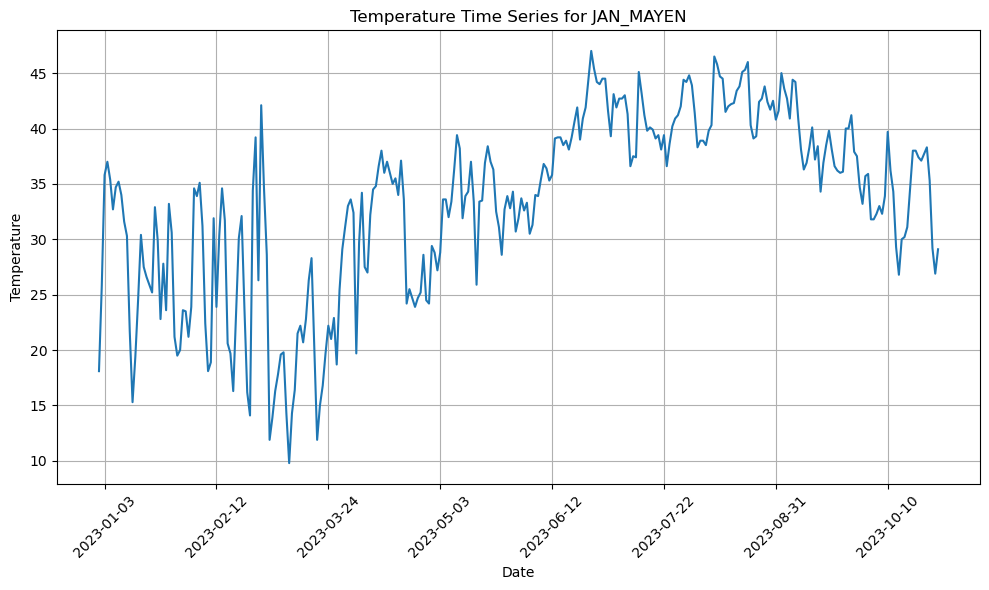

In [12]:
# Convert the 'DATE' column to datetime format
JAN_MAYEN['DATE'] = pd.to_datetime(JAN_MAYEN['DATE'])

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(JAN_MAYEN['DATE'], JAN_MAYEN['TEMP'])

# Customize the plot
plt.title('Temperature Time Series for JAN_MAYEN')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Set number of ticks on x-axis
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Compute the statistical measures
mean_temp = JAN_MAYEN['TEMP'].mean()
max_temp = JAN_MAYEN['TEMP'].max()
min_temp = JAN_MAYEN['TEMP'].min()
var_temp = JAN_MAYEN['TEMP'].var()
range_temp = max_temp - min_temp

# Print the results
print("Mean Temperature:", mean_temp)
print("Maximum Temperature:", max_temp)
print("Minimum Temperature:", min_temp)
print("Variance of Temperature:", var_temp)
print("Range of Temperature:", range_temp)

Mean Temperature: 33.342
Maximum Temperature: 47.0
Minimum Temperature: 9.8
Variance of Temperature: 65.63501939799333
Range of Temperature: 37.2


  Based on the provided temperature data, we can conduct some preliminary analysis of climate characteristics.
①Temperature range and variation: Based on data with a maximum temperature of 47.0 degrees Fahrenheit and a minimum temperature of 9.8 degrees Fahrenheit, it can be seen that the temperature range in the area is relatively large. This range of changes may indicate significant temperature changes in the climate of the region at different times of the day or year.
②Average temperature: Based on data with an average temperature of 33.342 degrees Fahrenheit, we can preliminarily determine that the area may belong to a cold climate type with harsh climatic conditions.
③Temperature variance: Based on the data with a temperature variance of 65.63501939799333, it can be inferred that the temperature change in the area is relatively severe. This may indicate that the climate change in the area is unstable and there are significant temperature fluctuations.
④Seasonal changes: We did not provide detailed information on the time range, but it can be seen from the graph that the average temperature from January to May is low but fluctuates greatly, while the average climate from June to August is high and fluctuates slightly, showing significant seasonal changes.